In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from scipy.stats import norm
import datetime


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [7]:
symbols=['GS', 'TSLA', 'AAPL']
start = '2024-02-01'
end = '2024-02-29'

In [8]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = yf.download(sym, start, end)['Adj Close']
data.dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,GS,TSLA,AAPL
Date,,,
2024-02-01,383.850006,188.860001,186.621872
2024-02-02,387.859985,187.910004,185.613159
2024-02-05,383.019989,181.059998,187.440811
2024-02-06,384.989990,185.100006,189.058762
2024-02-07,386.660004,187.580002,189.168625
2024-02-08,385.040009,189.559998,188.080017
2024-02-09,384.260010,193.570007,188.850006
2024-02-12,392.640015,188.130005,187.149994
2024-02-13,378.750000,184.020004,185.039993


In [9]:
symbol = data.columns

In [10]:
data.tail()

,GS,TSLA,AAPL
Date,,,
2024-02-16,384.440002,199.949997,182.309998
2024-02-20,384.519989,193.759995,181.559998
2024-02-21,388.269989,194.770004,182.320007
2024-02-22,390.470001,197.410004,184.369995
2024-02-23,392.274994,196.348694,184.475006


In [11]:
data_returns = (np.log(data) - np.log(data.shift(1))).dropna()

In [12]:
data_returns

,GS,TSLA,AAPL
Date,,,
2024-02-02,0.010393,-0.005043,-0.005420
2024-02-05,-0.012557,-0.037135,0.009798
2024-02-06,0.005130,0.022068,0.008595
2024-02-07,0.004328,0.013309,0.000581
2024-02-08,-0.004199,0.010500,-0.005771
2024-02-09,-0.002028,0.020934,0.004086
2024-02-12,0.021574,-0.028506,-0.009043
2024-02-13,-0.036017,-0.022089,-0.011338
2024-02-14,-0.001876,0.025167,-0.004821


In [13]:
data_returns_mean = data_returns.mean()
weights = np.random.random(len(data.columns))
weights /= np.sum(weights)
cov_var = data_returns.cov()
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

In [14]:
initial_investement = 10000
conf_level = 0.95

In [15]:
def VaR_parametric(initial_investement, conf_level):
    alpha = norm.ppf(1 - conf_level, data_returns_mean, port_std)
    for i, j in zip(data.columns, range(len(data.columns))):
        VaR_param = (initial_investement - initial_investement * (1 + alpha))

        print("Parametric VaR  result for {} i s {}".format(i, VaR_param))
    VaR_param = (initial_investement-initial_investement * (1 + alpha))
    print('--' * 25)
    return VaR_param


In [16]:
VaR_param = VaR_parametric(initial_investement, conf_level)

Parametric VaR  result for GS i s [185.97678453 174.52686182 208.16461802]
Parametric VaR  result for TSLA i s [185.97678453 174.52686182 208.16461802]
Parametric VaR  result for AAPL i s [185.97678453 174.52686182 208.16461802]
--------------------------------------------------


<ipython-input-17-d3416e84beba>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(var_horizon[:time_horizon], 'o',
<ipython-input-17-d3416e84beba>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(var_horizon[:time_horizon:time_horizon + 30], 'o',
<ipython-input-17-d3416e84beba>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(var_horizon[time_horizon + 30:time_horizon + 60], 'o',


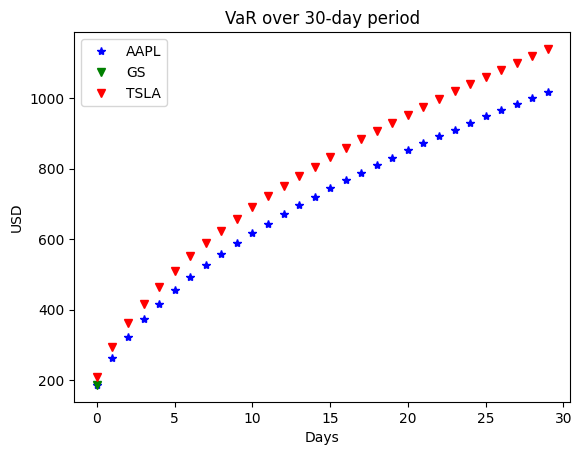

In [17]:
var_horizon = []
time_horizon = 30
for j in range(len(data_returns.columns)):
    for i in range(1, time_horizon +1):
        var_horizon.append(VaR_param[j] * np.sqrt(i))
plt.plot(var_horizon[:time_horizon], 'o',
         c = 'blue', marker='*', label = 'AAPL')
plt.plot(var_horizon[:time_horizon:time_horizon + 30], 'o',
         c='green', marker='v', label='GS')
plt.plot(var_horizon[time_horizon + 30:time_horizon + 60], 'o',
         c="red", marker='v', label='TSLA')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('VaR over 30-day period')
plt.legend()
plt.show()

In [18]:
def var_historical(initial_investement, conf_level):
    Hist_percentiles95 = []
    for i , j in zip(data_returns.columns,
                     range(len(data_returns.columns))):
        Hist_percentiles95.append(np.percentile(data_returns.loc[:, i],
                                                5))
        print("Based on Historical value 95% of {} s return is {:.4f}"
               .format(i, Hist_percentiles95[j]))
        var_historical = (initial_investement-initial_investement *
                           1 + Hist_percentiles95[j])
        print('Historical VaR Result for {} is {:.2f}'
               .format(i, var_historical))
        print('--' * 35)


In [19]:
var_historical(initial_investement, conf_level)

Based on Historical value 95% of GS s return is -0.0196
Historical VaR Result for GS is -0.02
----------------------------------------------------------------------
Based on Historical value 95% of TSLA s return is -0.0332
Historical VaR Result for TSLA is -0.03
----------------------------------------------------------------------
Based on Historical value 95% of AAPL s return is -0.0097
Historical VaR Result for AAPL is -0.01
----------------------------------------------------------------------


In [20]:
X = np.random.uniform(-1, 1, 100)
y = np.random.uniform(-1, 1, 100)

In [21]:
sample = 100
def pi_calc(X, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(X[i] ** 2 + y[i] ** 2) <= 1:
            point_inside_circle += 1
    print('pi value is {}'.format(4 * point_inside_circle/sample))




In [22]:
pi_calc(X,y)

pi value is 3.24


In [23]:
sample = 1000000
def pic_calc(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(X[i] ** 2 + y[i] ** 2) < 1:
            point_inside_circle += 1
    print('pi value is {:.2f}'.format(4 * point_inside_circle/sample))


In [24]:
sim_data = pd.DataFrame([])
num_reps = 1000
mean = np.random.random(3)
std = np.random.random(3)
for i in range(len(data_returns.columns)):
    temp = pd.DataFrame(np.random.normal(mean[i], std[i], num_reps))
    sim_data = pd.concat([sim_data, temp], axis=1)
sim_data.columns = ['Simulation 1', 'Simulation 2', 'Simulation 3']

In [25]:
sim_data

,Simulation 1,Simulation 2,Simulation 3
0,0.420780,0.907303,1.209198
1,0.132648,0.035773,0.728818
2,0.423122,-0.620513,-0.375961
3,0.030100,-0.436079,-0.461764
4,-0.211238,1.297792,1.328863
...,...,...,...
995,0.591692,0.839299,1.071020
996,0.729423,-0.464728,1.588641
997,-0.160257,0.283336,0.572062
998,0.523866,0.510025,2.173334


In [26]:
def MC_VaR(initial_investement, conf_level):
    MC_percentile95 = []
    for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
        MC_percentile95.append(np.percentile(sim_data.loc[:, i], 5))
        print("Based on simulation 95% of {}' s return is {:.4f}"
              .format(i, MC_percentile95[j]))
        VaR_MC = (initial_investement-initial_investement *
                  (1 + MC_percentile95[j]))
        print("Simulations VaR Results for {} is {:.2f}".format(i, VaR_MC))
        print('--' * 35)

In [27]:
MC_VaR(initial_investement, conf_level)

Based on simulation 95% of Simulation 1' s return is -0.1546
Simulations VaR Results for Simulation 1 is 1545.52
----------------------------------------------------------------------
Based on simulation 95% of Simulation 2' s return is -1.1788
Simulations VaR Results for Simulation 2 is 11788.50
----------------------------------------------------------------------
Based on simulation 95% of Simulation 3' s return is -0.7262
Simulations VaR Results for Simulation 3 is 7261.96
----------------------------------------------------------------------


# Effective Cost For Buyer and Sell

In [45]:
symbols_ = ['GS']
start_ = '2024-02-01'
end_ = '2024-02-29'

In [52]:
data_ = yf.download(symbols_, start_, end_)

[*********************100%%**********************]  1 of 1 completed


In [53]:
data_

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-01,384.429993,389.540009,378.799988,383.850006,383.850006,2138500
2024-02-02,381.799988,388.739990,380.600006,387.859985,387.859985,2180900
2024-02-05,384.600006,385.329987,381.000000,383.019989,383.019989,2231100
2024-02-06,383.019989,386.820007,383.000000,384.989990,384.989990,1487800
2024-02-07,385.309998,387.070007,382.500000,386.660004,386.660004,1963200
2024-02-08,386.000000,388.109985,381.339996,385.040009,385.040009,1913700
2024-02-09,384.769989,386.130005,382.589996,384.260010,384.260010,2028200
2024-02-12,385.000000,396.350006,384.320007,392.640015,392.640015,2797200
2024-02-13,387.589996,389.160004,375.200012,378.750000,378.750000,3030800


In [54]:
data_['Bid'] = data_['Low']
data_['Ask'] = data_['Open']

In [55]:
data_

,Open,High,Low,Close,Adj Close,Volume,Bid,Ask
Date,,,,,,,,
2024-02-01,384.429993,389.540009,378.799988,383.850006,383.850006,2138500,378.799988,384.429993
2024-02-02,381.799988,388.739990,380.600006,387.859985,387.859985,2180900,380.600006,381.799988
2024-02-05,384.600006,385.329987,381.000000,383.019989,383.019989,2231100,381.000000,384.600006
2024-02-06,383.019989,386.820007,383.000000,384.989990,384.989990,1487800,383.000000,383.019989
2024-02-07,385.309998,387.070007,382.500000,386.660004,386.660004,1963200,382.500000,385.309998
2024-02-08,386.000000,388.109985,381.339996,385.040009,385.040009,1913700,381.339996,386.000000
2024-02-09,384.769989,386.130005,382.589996,384.260010,384.260010,2028200,382.589996,384.769989
2024-02-12,385.000000,396.350006,384.320007,392.640015,392.640015,2797200,384.320007,385.000000
2024-02-13,387.589996,389.160004,375.200012,378.750000,378.750000,3030800,375.200012,387.589996


In [57]:
data_ ['Mid_price'] = (data_['Ask'] + data_['Bid']) / 2
buyer_seller_initiated =[]
for i in range(len(data_)):
    if data_['Adj Close'][i] > data_['Mid_price'][i]:
       buyer_seller_initiated.append(1)
    else:
       buyer_seller_initiated.append(0)
data_['buyer_seller_init'] = buyer_seller_initiated

In [58]:
effective_cost = []
for i in range(len(data_)):
    if data_['buyer_seller_init'][i] == 1:
       effective_cost.append((data_['Adj Close'][i] - data_['Mid_price'][i]) / data_['Mid_price'])
    else:
       effective_cost.append((data_['Mid_price'][i] - data_['Adj Close']) / data_['Mid_price'])
data_['effective_cost'] = effective_cost

In [62]:
data_['quoted'] = data_['Ask'] - data_['Bid']
data_['prop_quoted'] = (data_['Ask'] - data_['Bid']) / data_['Mid_price']
data_['effective'] = 2 * abs(data_['Adj Close'] - data_['Mid_price'])
data_['prop_effective'] = 2 * abs(data_['Adj Close'] - data_['Mid_price']) /  data_['Adj Close']

In [63]:
spread_measures = data_.iloc[:, -5:]

In [78]:
spread_measures.corr()

<ipython-input-78-5bc5aad730e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spread_measures.corr()


,quoted,prop_quoted,effective,prop_effective
quoted,1.000000,0.999990,-0.388179,-0.382961
prop_quoted,0.999990,1.000000,-0.388007,-0.382787
effective,-0.388179,-0.388007,1.000000,0.999895
prop_effective,-0.382961,-0.382787,0.999895,1.000000


In [79]:
spread_measures.describe()

,quoted,prop_quoted,effective,prop_effective
count,16.000000,16.000000,16.000000,16.000000
mean,2.610622,0.006837,6.479374,0.016717
std,3.236481,0.008488,4.997472,0.012797
min,0.019989,0.000051,0.439972,0.001149
25%,0.267502,0.000701,2.732513,0.007072
50%,1.689987,0.004415,4.990005,0.013083
75%,3.865005,0.010090,10.480003,0.026765
max,12.389984,0.032486,15.960022,0.040648


In [80]:
high_corr = spread_measures.corr().unstack()\
            .sort_values(ascending=False).drop_duplicates()

high_corr = high_corr[(high_corr > 0.80) & (high_corr != 1)]

<ipython-input-80-9f1f86cf8c1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_corr = spread_measures.corr().unstack()\


In [81]:
sorted_spread_measures = data_.iloc[:, -5:-2]

In [82]:
sorted_spread_measures

,effective_cost,quoted,prop_quoted
Date,,,
2024-02-01,Date 2024-02-01 0.005857 2024-02-02 0.00...,5.630005,0.014753
2024-02-02,Date 2024-02-01 0.017452 2024-02-02 0.01...,1.199982,0.003148
2024-02-05,Date 2024-02-01 0.000576 2024-02-02 0.00...,3.600006,0.009404
2024-02-06,Date 2024-02-01 0.005188 2024-02-02 0.00...,0.019989,0.000052
2024-02-07,Date 2024-02-01 0.007219 2024-02-02 0.00...,2.809998,0.007320
2024-02-08,Date 2024-02-01 0.003590 2024-02-02 0.00...,4.660004,0.012146
2024-02-09,Date 2024-02-01 0.001520 2024-02-02 0.00...,2.179993,0.005682
2024-02-12,Date 2024-02-01 0.020911 2024-02-02 0.02...,0.679993,0.001768
2024-02-13,Date 2024-02-01 -0.006433 2024-02-02 -0.01...,12.389984,0.032486


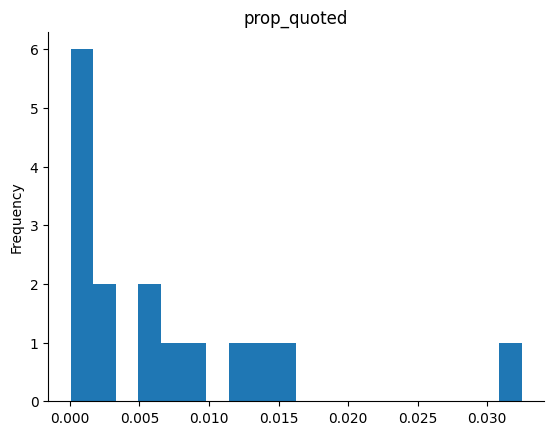

In [89]:
# @title prop_quoted

from matplotlib import pyplot as plt
sorted_spread_measures['prop_quoted'].plot(kind='hist', bins=20, title='prop_quoted')
plt.gca().spines[['top', 'right',]].set_visible(False)

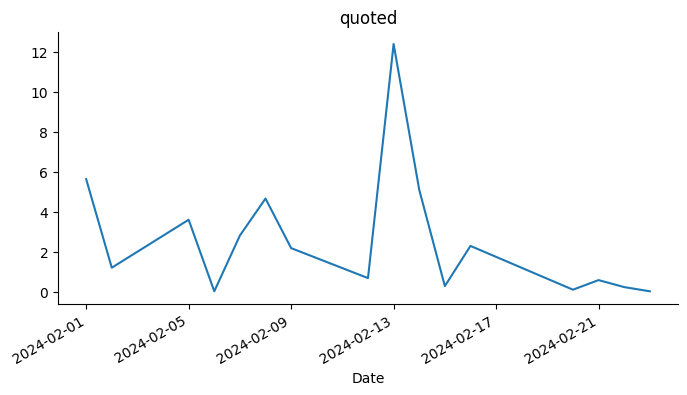

In [88]:
# @title quoted

from matplotlib import pyplot as plt
sorted_spread_measures['quoted'].plot(kind='line', figsize=(8, 4), title='quoted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [83]:
cross_sec_mean_corr = sorted_spread_measures.mean(axis=1).mean()

<ipython-input-83-c22cfbf36288>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cross_sec_mean_corr = sorted_spread_measures.mean(axis=1).mean()


In [87]:
std_corr = sorted_spread_measures.std().sum() / 3

<ipython-input-87-08d246a6bd38>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_corr = sorted_spread_measures.std().sum() / 3
